In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data = pd.read_excel("india_vaccine_tweets_2.xlsx")
vader = pd.read_csv("vader.csv")
data.shape, data.columns, vader.shape

((44130, 16),
 Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
        'user_followers', 'user_friends', 'user_favourites', 'user_verified',
        'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
        'is_retweet'],
       dtype='object'),
 (44130, 1))

In [3]:
import re
def clean_text(text):
    text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
    text = re.sub(r"#[A-Za-z0-9]+", ' ', text)
    text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
    text = re.sub(r"[^a-zA-z.!?'0-9]", ' ', text)
    text = re.sub(r"\b\d+\b", '', text)
    text = re.sub('\t', ' ',  text)
    text = re.sub(r" +", ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower()

def removeTime(date):
    return date.split()[0]

In [5]:
data['text_processed'] = data['text'].apply(clean_text)
data['date'] = data['date'].apply(removeTime)
data['vader'] = vader['vader']
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,text_processed,vader
0,1337815730486702080,WION,India,#WION: World Is One | Welcome to India’s first...,2016-03-21 03:44:54,292510,91,7531,True,2020-12-12,The agency also released new information for h...,NaN,TweetDeck,0,18,False,the agency also released new information for h...,positive
1,1337773751841145088,BOOM Live,"Mumbai, India",IFCN certified fact-driven journalism. India's...,2014-03-16 03:52:50,64185,1183,1794,True,2020-12-12,The US Food and Drug Administration (FDA) has ...,NaN,Twitter Web App,1,5,False,the us food and drug administration fda has gr...,negative
2,1338631874814619904,Dr. Taha Khan,India | USA,MD/MPH • PGY1 Peds/Child Neurology @theBCRP (@...,2013-12-30 08:51:23,855,3046,8236,False,2020-12-14,I’ve never been so excited to get a vaccine 💉💉...,"['CovidVaccine', 'PfizerBioNTech', 'VaccinesSa...",Twitter for iPhone,1,10,False,i ve never been so excited to get a vaccine,negative
3,1338574693087937024,Prof. Manish Thakur,India,#Proprietor English Academy #Blockchain #AI #I...,2012-06-11 13:50:05,3372,1713,119631,False,2020-12-14,#UgurSahin #ozlemtureci the #Muslim Scientists...,"['UgurSahin', 'ozlemtureci', 'Muslim', 'Pfizer...",Twitter for Android,0,0,False,the scientists husband wife are saving the wo...,neutral
4,1338551175587787008,India Blooms,India,A news and reference portal on India and a 24X...,2009-10-10 11:19:34,16816,2448,20,False,2020-12-14,Toronto to receive Ontario's 1st doses of Pfiz...,['Ontario'],Twitter Web App,0,0,False,toronto to receive ontarios 1st doses of pfize...,neutral


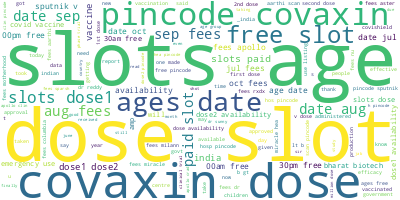

In [6]:
from wordcloud import WordCloud
long_string = ','.join(list(data['text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [7]:
# data_date = '2021-03-01'
# data_date = '2021-04-12'
# data_date = '2021-04-21'
# data_date = '2021-05-24'
# data_date = '2021-06-11'
# data_date = '2021-06-30'
# data_date = '2021-10-12'
data_date = '2021-11-03'
# data_senti = 'positive'
data_senti = 'negative'
data_temp = data.loc[data['date'] == data_date]
data_temp = data_temp.loc[data_temp['vader'] == data_senti]
data_text = data_temp['text_processed']
data_text.head()

41770    so much on the eve of govt cuts excise duty on...
41771     made in india gets nod han bhai koun bol raha...
41776     accepts bharat biotechs covaxin for emergency...
41795    made in india covaxin approved by for emergenc...
41800    what a moment of pride for india who can forge...
Name: text_processed, dtype: object

In [8]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
# data_list = data.text_processed.values.tolist()
data_list = data_text.values.tolist()
data_words = list(sent_to_words(data_list))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['much', 'eve', 'govt', 'cuts', 'excise', 'duty', 'petrol', 'diesel', 'rs']


[nltk_data] Downloading package stopwords to /home/aman-
[nltk_data]     anmol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [10]:
from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.059*"emergency" + 0.030*"facilitates" + 0.030*"countries" + '
  '0.030*"tenure" + 0.030*"appro" + 0.030*"regulatory" + 0.030*"extension" + '
  '0.030*"twit" + 0.030*"listing" + 0.030*"delaying"'),
 (1,
  '0.061*"emergency" + 0.046*"listing" + 0.046*"bharat" + 0.046*"granted" + '
  '0.031*"eul" + 0.031*"made" + 0.031*"vaccine" + 0.031*"health" + '
  '0.031*"india" + 0.016*"bi"'),
 (2,
  '0.038*"indigenously" + 0.038*"emergency" + 0.025*"gets" + 0.025*"made" + '
  '0.025*"day" + 0.025*"world" + 0.025*"covid" + 0.025*"developed" + '
  '0.025*"india" + 0.013*"went"'),
 (3,
  '0.061*"emergency" + 0.061*"biotech" + 0.061*"bharat" + 0.031*"congratula" + '
  '0.031*"health" + 0.031*"eul" + 0.031*"breaking" + 0.031*"organization" + '
  '0.031*"authorized" + 0.031*"devolved"'),
 (4,
  '0.073*"india" + 0.037*"emergency" + 0.037*"govt" + 0.019*"cuts" + '
  '0.019*"created" + 0.019*"rest" + 0.019*"made" + 0.019*"petrol" + '
  '0.019*"moment" + 0.019*"pm"'),
 (5,
  '0.055*"emergency" + 0.0

In [11]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+data_date+'_'+data_senti)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+data_date+'_'+data_senti +'.html')
LDAvis_prepared

/usr/lib/python3/dist-packages/scipy/sparse/_sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy v

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.149712  0.064481       1        1  13.938133
5     -0.101000 -0.068956       2        1   8.079997
18    -0.013221  0.125638       3        1   7.906592
1     -0.079844  0.050106       4        1   7.824915
7     -0.078599 -0.131160       5        1   7.496258
2      0.025488  0.172491       6        1   7.313842
4      0.145398  0.018839       7        1   5.675567
15    -0.090701 -0.069417       8        1   4.474389
8      0.149067 -0.031204       9        1   4.442929
16    -0.068682  0.003625      10        1   4.382441
12     0.015514  0.092016      11        1   4.293052
6      0.158348 -0.031790      12        1   4.219916
9     -0.024990 -0.037113      13        1   3.268242
13     0.017455 -0.053951      14        1   2.944252
0      0.027729  0.006953      15        1   2.833265
3     -0.067642  0.000690      16        1   2.797946
11     0.000741 -0.073911      17        1   2.558455
17     0.118463 -0.050891      18        1   2.504207
14     0.035702 -0.012084      19        1   1.742174
19    -0.019514  0.025639      20        1   1.303429, topic_info=         Term       Freq      Total Category  logprob  loglift
28     bharat  18.000000  18.000000  Default  30.0000  30.0000
17      india  12.000000  12.000000  Default  29.0000  29.0000
88    granted  10.000000  10.000000  Default  28.0000  28.0000
48        eul  13.000000  13.000000  Default  27.0000  27.0000
32  emergency  35.000000  35.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
12        bol   0.014765   1.282645  Topic20  -6.3885  -0.1242
13      danka   0.014765   1.282650  Topic20  -6.3885  -0.1242
14     failed   0.014765   1.825721  Topic20  -6.3885  -0.4773
16        han   0.014765   1.282641  Topic20  -6.3885  -0.1242
17      india   0.014765  12.596820  Topic20  -6.3885  -2.4087

[844 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
74       10  0.800416   accepted
27        1  0.626065    accepts
27        8  0.208688    accepts
27       13  0.208688    accepts
178       2  0.730359     access
...     ...       ...        ...
78       10  0.115918      world
78       11  0.115918      world
78       16  0.115918      world
182       2  0.730363  worldwide
104       8  0.824046      years

[498 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 6, 19, 2, 8, 3, 5, 16, 9, 17, 13, 7, 10, 14, 1, 4, 12, 18, 15, 20])